# Método das diferenças finitas: Difusão

Vamos resolver a equação de difusão 1D:

$$\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2}$$

em que $T$ é a temperatura e $\alpha$ é uma constante chamada de [difusividade térmica](https://pt.wikipedia.org/wiki/Difusividade_t%C3%A9rmica).

## Setup

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

As células abaixo definem funções que criam o domínio e as condições iniciais.

In [3]:
def cria_dominios(tamanho, Nx, duração, Nt):
    """
    Cria o domínio espacial e calcula os intervalos de tempo e espaço.
    
    Retorna os valores de x, dx e dt
    """
    x = np.linspace(0, tamanho, Nx)
    dx = x[1] - x[0]
    dt = duração/(Nt - 1)
    return x, dx, dt

In [4]:
x, dx, dt = cria_dominios(tamanho=1, Nx=51, duração=1, Nt=21)
print('dx =', dx, 'dt =', dt)

dx = 0.02 dt = 0.05


In [5]:
def cria_cond_inicial(x):
    """
    Cria um vetor de condições iniciais u0 com uma função degrau.
    """
    T = np.zeros(x.size)
    T[(x >= 0.3) & (x <= 0.7)] = 100
    return T

(0, 150)

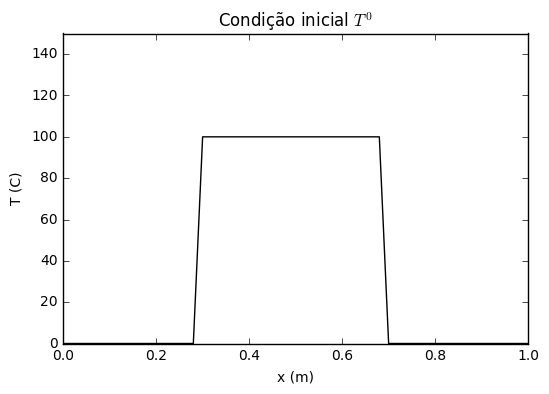

In [6]:
cond_inicial = cria_cond_inicial(x)

plt.figure()
plt.plot(x, cond_inicial, '-k')
plt.xlabel('x (m)')
plt.ylabel('T (C)')
plt.title('Condição inicial $T^0$')
plt.ylim(0, 150)

## Tarefa 1

Complete a função abaixo que executa 1 único passo no tempo utilizando diferenças progressivas no tempo.

In [8]:
def passo_no_tempo(T_passado, dx, dt, difusividade):
    """
    Executa 1 passo no tempo da equação de difusão.
    
    Dada a temperatura em uma iteração passada T_passado, 
    utiliza o método das diferenças finitas 
    para calcular a temperatura após um único passo no tempo
    T_futuro.
    
    OBS: Não inclui condições de contorno.
    """
    T_futuro = T_passado.copy()
    Nx = len(T_passado) #contar o numeros de elemento de T_passado
    for k in range(1,Nx-1): #usamos o for e range para variar as posições dentro de T_passado
        T_futuro[k]= T_passado[k]+ difusividade*(dt/(dx*dx))*(T_passado[k+1]-2*T_passado[k]+T_passado[k-1])
        #repassamos a equação dada em sala para a função
    return T_futuro

Use as células abaixo para checar se sua função funciona. Vamos tentar dar um único passo no tempo a partir de uma condição inicial.

In [9]:
x, dx, dt = cria_dominios(tamanho=1, Nx=51, duração=1, Nt=20)
T0 = cria_cond_inicial(x)
T1 = passo_no_tempo(T0, dx, dt, difusividade=0.001)

(0, 150)

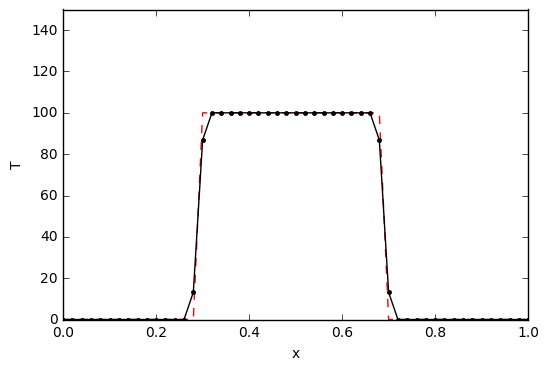

In [10]:
plt.figure()
plt.plot(x, T0, '--r')
plt.plot(x, T1, '.-k')
plt.xlabel('x')
plt.ylabel('T')
plt.ylim(0, 150)

## Tarefa 2

Complete a função abaixo que impõe condições de contorno na nossa solução. As condições serão:

* Em x=0, o material é mantido a uma temperatura constante $T(x=0, t) = 0° C$
* Em x=1 (no final do domínio), o material é isolado térmicamente. Isso quer dizer que não há variação espacial de temperatura em x=1, ou seja, $\frac{\partial T}{\partial x}(x=1, t) = 0$

In [ ]:
def cond_contorno(T):
    """
    Impõe condições de contorno na distribuição de temperaturas T.
    
    Em x = 0, a temperatura é constante e igual a 0°C.
    Em x = 1, a derivada espacial da temperatura é 0.
    
    Essa função muda os valores da variável T e a retorna.
    """
    
    return T

Vamos testar a função aplicando-a a um numpy.array qualquer que vamos criar. Nas posições 0 e -1, vamos colocar valores absurdos e ver se a nossa função `cond_contorno` insere os valores adequados.

In [ ]:
T_teste = np.array([1000000, 1, 2, 3, 4, 5, 6, -1000000])
T_teste = cond_contorno(T_teste)
print(T_teste)

## Tarefa 3

Complete a função abaixo que executa uma simulação completa de diferenças finitas (utilizando as funções definidas acima) para uma deterimada duração. A função deve retornar uma lista com a temperatura para cada iteração do método.

In [ ]:
def simula(tamanho, Nx, duração, Nt, difusividade):
    """
    Executa uma simulação completa da equação de difusão 
    utilizando diferenças finitas.
    
    1. Cria o domínio e a condição inicial
    2. Executa Nt passos no tempo
    3. Retorna o domínio (x) e uma lista com o resultado
       de cada passo no tempo (T).
    
    Para cada passo no tempo, impõe as condições de contorno:
    Em x = 0, a temperatura é constante e igual a 0°C.
    Em x = 1, a derivada espacial da temperatura é 0.
    
    """
    
    T_inicial = 
    T = [T_inicial]
    T_passado = T_inicial
    for  in range(  ):
        
        
    return x, T

Utilize as células abaixo para checar o resultado da sua função.

In [ ]:
x, T = simula(tamanho=1, Nx=50, duração=100, Nt=500, difusividade=0.001)

In [ ]:
plt.figure()
plt.plot(x, T[0], '--r')
plt.plot(x, T[-1], '.-k')
plt.xlabel('x (m)')
plt.ylabel('T (C)')
plt.ylim(0, 150)

## Tarefa 4

Rode a simulação para com os parâmetros `tamanho=1, Nx=50, duração=100, Nt=600, difusividade=0.001`. Faça um gráfico que mostre as curvas de temperatura para cada 100 passos no tempo. Coloque uma legenda na sua figura indicando qual curva representa qual passo no tempo.

## Bônus

Gere uma animação em formato gif da evolução da temperatura na simulação da tarefa 4. 

* Cada imagem do gif deve ser um gráfico com o perfil de temperaturas por x. 
* O título de cada imagem deve ser o número da iteração.
* Gere uma imagem a cada 10 iterações.
* Não esqueça de fechar cada figura com `plt.close()` antes de criar uma nova.

Seu resultado deve ficar parecido com o seguinte:

![`difusao.gif`](difusao.gif)

**Course website**: https://github.com/mat-esp/about

**Note**: This notebook is part of the course "Matemática Especial I" of the [Universidade do Estado do Rio de Janeiro](http://www.uerj.br/). All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)